In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso,LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.datasets import load_diabetes,make_regression

In [16]:
# Making a regressive dataset using method make_regression from datasets
X , y = make_regression(n_features=1 , n_samples=100 , noise = 22 , n_informative=1 , n_targets=1 , random_state = 42)

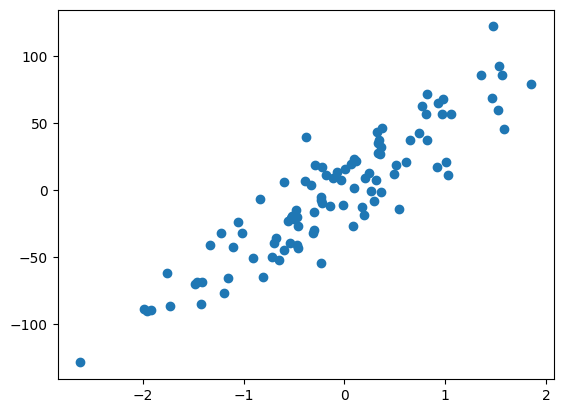

In [17]:
plt.scatter(X,y)
plt.show() # Lets plot the scatterplot for it.

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) # Splitting the dataset

In [19]:
# Now we will get the coef and intercept to compare model performance with LinearRegression

lr = LinearRegression() #Instantiate the model

lr.fit(X_train,y_train) # Fitting the model with the training set of data

y_pred_lr = lr.predict(X_test) # Prediction using testing set

lr.coef_,lr.intercept_

(array([46.73622685]), np.float64(2.0106499165778637))

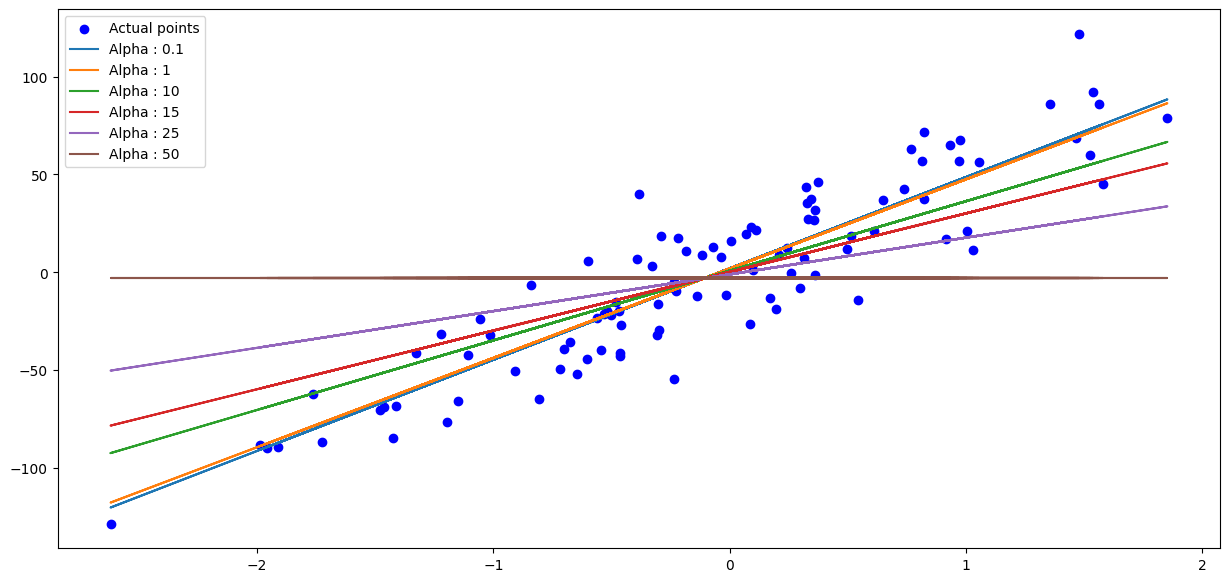

In [ ]:
# Now lets do this using Lasso
# Here we will use a number of alpha for testing so we will loop the steps 
# Also we will use an array of alphas to understand the behaviour of alpha

alphas = [0.1 , 1 , 10 , 15 , 25, 50] # Test values of alpha

# We will plot the graph outside as we dont want this to loop all over unreasonably
plt.figure(figsize=(15,7))
plt.scatter(X,y,color='blue',label='Actual points')

# Now iterating over alpha values:

for alpha in alphas:
    las = Lasso(alpha=alpha) # Instantiation with current alpha value
    las.fit(X_train,y_train) # Fit the training set 
    y_pred_las = las.predict(X_test) # Predict using Lasso model 
    plt.plot(X_test,y_pred_las , label = f"Alpha : {alpha}" ) # Note : If we want full lines we can predict with and plot with X
plt.legend()
plt.show()

# As we see in the graph below by the increase in no of alpha underfitting increases and reducing bias , but increasing variance .
# At the start the alpha value 0.1 makes the line overfit with training poitns reducing the prediction correctness.